## Groupwork Assignment Submission 2: Optimizing 2 and 3 Security Portfolios

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Data Importing**


1.1 Import 11 ETFs, which are the Select Spdrs (e.g. XLF, XLE, etc.).  Some of this period did not include 
the Real Estate sector fund.

ETFs = XLB 	XLE 	XLF 	XLI 	XLK 	XLP 	IYR 	XLU 	XLV 	XLY 	VOX

We use IYR and VOX instead of the corresponding SPRDs, as these have more data.

* We import the data using pickle module:

In [2]:
SPDRS = ['XLB','XLE','XLF','XLI','XLK','XLP','IYR','XLU','XLV','XLY','VOX']

In [3]:
with open('spdrs.pkl', 'rb') as f:
    data = pickle.load(f)

**Data Processing**


2.1 Select 2 of the Select SPDR ETFs. Form an equally weighted portfolio of these 2 securities.

* We select XLF (Financial Select Sector SPDR Fund) and XLK (Technology Select SPDR Fund)

In [4]:
ourAssets = ["XLF","XLK"]
portfolioTwoAsset = data[ourAssets].sort_index(axis=0 ,ascending=True)

2.2 Compute the standard deviation of each of the securities

In [5]:
portfolioTwoAsset.std()

XLF     2.549649
XLK    23.126322
dtype: float64

2.3 Compute the correlation between the securities.

In [6]:
portfolioTwoAsset.pct_change().dropna().corr()

,XLF,XLK
XLF,1.000000,0.709606
XLK,0.709606,1.000000


2.4 Write a function that computes the weighted return of a portfolio. 

In [7]:
def getPortfolioReturn(weights:list,portfolio:pd.DataFrame)->float:

    if (len(portfolio.columns)!=len(weights)):
        raise ValueError ("Length of weights vector is not consistent with the number of assets.")

    #Annual expected asset return based on historical daily returns
    assetReturn=(1+portfolio.pct_change().dropna().mean())**252-1

    #Portfolio return
    portfolioReturn = 0
    for i in range(len(weights)):
        portfolioReturn += weights[i]*assetReturn.iloc[i]

    return portfolioReturn

In [8]:
portfolioReturn = getPortfolioReturn(weights=[0.5,0.5],portfolio=portfolioTwoAsset)

2.5 Write a function that computes the portfolio standard deviation.

In [9]:
def getPortfolioVolatility(weights:list,portfolio:pd.DataFrame,correlationMatrix:pd.DataFrame)->float:    
    if (len(portfolio.columns)!=len(weights)):
        raise ValueError ("Length of weights vector is not consistent with the number of assets.")

    portfolioVolatility = 0
    for i in range(0,len(weights)):
        #portfolioVolatility  += (weights[i]*portfolio.std().iloc[i] / portfolio.mean().iloc[i])**2
        portfolioVolatility  += (weights[i]*portfolio.pct_change().dropna().std().iloc[i] * np.sqrt(252))**2

    for i in range(0,len(weights)):
        for j in range(i+1,len(weights)):

            #portfolioVolatility += 2*weights[i]*weights[j]*correlationMatrix.iloc[i,j] \
            #                     * portfolio.std().iloc[i] / portfolio.mean().iloc[i] \
            #                     * portfolio.std().iloc[j] / portfolio.mean().iloc[j]

            portfolioVolatility += 2*weights[i]*weights[j]*correlationMatrix.iloc[i,j] \
                                 * portfolio.pct_change().dropna().std().iloc[i] * np.sqrt(252) \
                                 * portfolio.pct_change().dropna().std().iloc[j] * np.sqrt(252)

    portfolioVolatility = np.sqrt(portfolioVolatility)

    return portfolioVolatility

In [10]:
correlationMatrix = portfolioTwoAsset.pct_change().dropna().corr()
portfolioVolatility = getPortfolioVolatility([0.5,0.5],portfolioTwoAsset,correlationMatrix)

**Category 1 Portfolio: 2 Sectors**


3.1 Write a function showing the efficient frontier (EF) of your portfolio.  

Be sure to vary the weights of the security from (0, 100%), (1%, 99%), … (100%, 0%).  

* Function:

In [11]:
def plotEfficientFrontier(setOfWeights:list,portfolio:pd.DataFrame,correlationMatrix:pd.DataFrame,ax):

    expectedReturn=[]
    volatility    =[]
    for weights in setOfWeights:
        expectedReturn.append(getPortfolioReturn(weights,portfolio))
        volatility.append(getPortfolioVolatility(weights,portfolio,correlationMatrix))

    ax.plot(volatility,expectedReturn,label=r'$\rho$=%.3f'%correlationMatrix.iloc[0,1])

3.2 What is the leftmost point of the EF called?

* Minimum variance portfolio

**Answers from 3.3 to 3.5, as we want to illustrate these on one plot:**

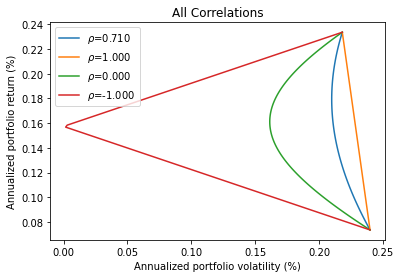

In [12]:
# Initialize figure
_,ax = plt.subplots(1,1)
ax.set_ylabel("Annualized portfolio return (%)")
ax.set_xlabel("Annualized portfolio volatility (%)")

setOfWeights = [[i,1-i] for i in np.arange(0,1.01,0.01)]

# Plot with actual correlation
correlationMatrix = portfolioTwoAsset.pct_change().dropna().corr()
plotEfficientFrontier(setOfWeights,portfolioTwoAsset,correlationMatrix,ax)

# 3.3 Rerun your function, but pretend the correlation between the securities is 1.  
#Graph the EF.  Comment on the shape.
correlationMatrix = portfolioTwoAsset.pct_change().dropna().corr()
correlationMatrix.iloc[0,1] = 1
correlationMatrix.iloc[1,0] = 1
plotEfficientFrontier(setOfWeights,portfolioTwoAsset,correlationMatrix,ax)

# 3.4 Rerun your function, but pretend the correlation between the securities is 0.  
#Graph the EF.  Comment on the shape.
correlationMatrix = portfolioTwoAsset.pct_change().dropna().corr()
correlationMatrix.iloc[0,1] = 0
correlationMatrix.iloc[1,0] = 0
plotEfficientFrontier(setOfWeights,portfolioTwoAsset,correlationMatrix,ax)

# 3.5 Rerun your function, but pretend the correlation between the securities is -1.  
#Graph the EF.  Comment on the shape.
correlationMatrix = portfolioTwoAsset.pct_change().dropna().corr()
correlationMatrix.iloc[0,1] = -1
correlationMatrix.iloc[1,0] = -1
plotEfficientFrontier(setOfWeights,portfolioTwoAsset,correlationMatrix,ax)

ax.legend(loc="upper left")
plt.title("All Correlations")
plt.show()

**Comments:**

* As we plotted all on one chart, we can see that we get best optimal or minimum variance portfolio if the the correlation between the securities is -1, in this case the returns is about 16% and the portfolio volatility is close to 0%. Of course it`s not the case. 

* We would get the highest volatility if correlation between the securities is 1.

* As it seems having correlation between the securities 0 is still better then the actual correlation p = 0.71, with p = 0 we have higher return with lower volatility compared to p = 0.71.

3.6 Apply 5% trim to the data.  Recompute the correlation.  Rerun the EF.  

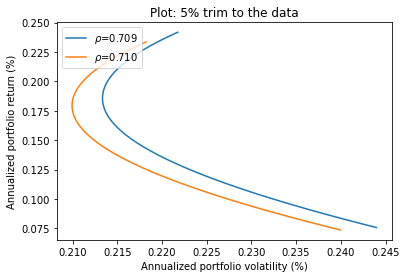

In [13]:
portfolioTwoAssetTrimmed = portfolioTwoAsset.iloc[int(len(portfolioTwoAsset)/20):]

# Initialize figure
_,ax2 = plt.subplots(1,1)
ax2.set_ylabel("Annualized portfolio return (%)")
ax2.set_xlabel("Annualized portfolio volatility (%)")

#Plot trimmed data
correlationMatrix = portfolioTwoAssetTrimmed.pct_change().dropna().corr()
plotEfficientFrontier(setOfWeights,portfolioTwoAssetTrimmed,correlationMatrix,ax2)

#Plot original data
correlationMatrix = portfolioTwoAsset.pct_change().dropna().corr()
plotEfficientFrontier(setOfWeights,portfolioTwoAsset,correlationMatrix,ax2)

ax2.legend(loc="upper left")
plt.title("Plot: 5% trim to the data")
plt.show()

3.7 How does the EF from the actual data compare to the EF from the trimmed data?

* Orange full data; Blue: 5% trimmed data. Removing a relatively small part of data does not change the results significantly.

3.8 Use a robust method of portfolio (see FRAPO R Library or pyportfolioopt Python module, for example).  
* We use here pypfopt module. (https://pyportfolioopt.readthedocs.io/en/latest/GeneralEfficientFrontier.html)

In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, objective_functions 
from pypfopt import expected_returns
from pypfopt import plotting

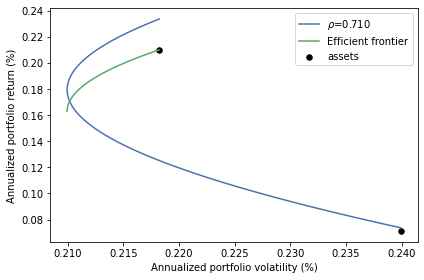

In [15]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(portfolioTwoAsset,compounding=False)
S = risk_models.sample_cov(portfolioTwoAsset)

# Compute with predifined weights
#ef = EfficientFrontier(mu, S)
#dictKeys = ourAssets
#dictVals = [0.5,0.5]
#weights = dict(zip(dictKeys,dictVals))
#ef.set_weights(weights)
#ef.portfolio_performance(verbose=True)

# 
ef = EfficientFrontier(mu, S)
#ef.add_constraint(lambda w: w[0] >= 0.2)
#ef.add_constraint(lambda w: w[2] == 0.15)
#ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax3 = plt.subplots(1,1)

#Plot our own calculation (Full data)
correlationMatrix = portfolioTwoAsset.pct_change().dropna().corr()
plotEfficientFrontier(setOfWeights,portfolioTwoAsset,correlationMatrix,ax3)

#Plot pyPortfolioOpt library calculations
plotting.plot_efficient_frontier(ef, ax=ax3, show_assets=True)

ax3.set_ylabel("Annualized portfolio return (%)")
ax3.set_xlabel("Annualized portfolio volatility (%)")
plt.show()

State the equation(s) of how this works.  Write a paragraph explaining how it works.


The library solves a convex optimization problem as follows:

\begin{split}\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimise}} & & w^T \Sigma w \\
& \text{subject to} & & w^T\mu \geq \mu^*\\
&&& w^T\mathbf{1} = 1 \\
&&& w_i \geq 0 \\
\end{aligned}
\end{equation*}\end{split}

Above $w$ denotes vector of the assets' weights (which are the decision variables), $\mu$ the vector of assets' expected return, and $\Sigma$ the covariance matrix. Moreover, $w^T\mu$ stands for the portfolio return, and $w^T\Sigma w$ the portfolio risk in terms of covariance matrix. Finally, $\mu^*$ is the target portfolio return, which is an input. In this setting, we try to minimize the risk for a given target portolio return using the assets' weights. 

3.9 How does this EF compare with the other 2:

Results are close, but not exactly the same. The main reason behind the difference between the two curves is that we seem to overshoot the expected return of the first asset (top-left dot). This is difficult to explain as we calculate the expected return of the second asset (bottom right dot) close to the one computed by the pyPortfolioOpt library.

**4 Category 2 Portfolio: 3 Sectors**

4.1 Add 1 ETF to your portfolio.  Calculate the correlation matrix for 3 ETFs chosen.  

* Added IYR.

In [16]:
three_Assets = ["XLF","XLK", "IYR"]
portfolioThreeAsset = data[three_Assets].sort_index(axis=0 ,ascending=True)

In [17]:
three_Assets_corr = portfolioThreeAsset.pct_change().dropna().corr()
three_Assets_corr

,XLF,XLK,IYR
XLF,1.000000,0.709606,0.653970
XLK,0.709606,1.000000,0.638674
IYR,0.653970,0.638674,1.000000


4.2	Graph the efficient frontier of this 3-security portfolio.

* We will vary the weights, but XLK and IYR, will have the same weights:

In [18]:
setOfWeights_three = [[i,(1-i)/2, 1-(i+(1-i)/2)] for i in np.arange(0,1.01,0.01)]

In [58]:
setOfWeights_three

[[0.0, 0.5, 0.5],
 [0.01, 0.495, 0.495],
 [0.02, 0.49, 0.49],
 [0.03, 0.485, 0.485],
 [0.04, 0.48, 0.48],
 [0.05, 0.475, 0.475],
 [0.06, 0.47, 0.47],
 [0.07, 0.46499999999999997, 0.4650000000000001],
 [0.08, 0.46, 0.45999999999999996],
 [0.09, 0.455, 0.45499999999999996],
 [0.1, 0.45, 0.44999999999999996],
 [0.11, 0.445, 0.44499999999999995],
 [0.12, 0.44, 0.43999999999999995],
 [0.13, 0.435, 0.43500000000000005],
 [0.14, 0.43, 0.42999999999999994],
 [0.15, 0.425, 0.42500000000000004],
 [0.16, 0.42, 0.42000000000000004],
 [0.17, 0.415, 0.41500000000000004],
 [0.18, 0.41000000000000003, 0.4099999999999999],
 [0.19, 0.405, 0.405],
 [0.2, 0.4, 0.3999999999999999],
 [0.21, 0.395, 0.395],
 [0.22, 0.39, 0.39],
 [0.23, 0.385, 0.385],
 [0.24, 0.38, 0.38],
 [0.25, 0.375, 0.375],
 [0.26, 0.37, 0.37],
 [0.27, 0.365, 0.365],
 [0.28, 0.36, 0.36],
 [0.29, 0.355, 0.355],
 [0.3, 0.35, 0.3500000000000001],
 [0.31, 0.345, 0.345],
 [0.32, 0.33999999999999997, 0.3400000000000001],
 [0.33, 0.33499999999999

In [61]:
portfolioThreeAsset.pct_change().dropna().std()

XLF    0.015114
XLK    0.013747
IYR    0.012591
dtype: float64

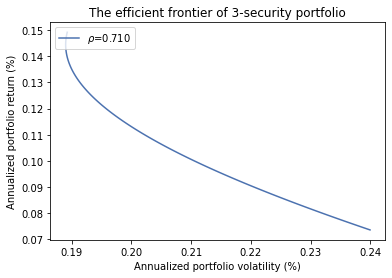

In [19]:
# Initialize figure
_,ax4 = plt.subplots(1,1)
ax4.set_ylabel("Annualized portfolio return (%)")
ax4.set_xlabel("Annualized portfolio volatility (%)")

plotEfficientFrontier(setOfWeights_three,portfolioThreeAsset,three_Assets_corr,ax4)
plt.title("The efficient frontier of 3-security portfolio")
ax4.legend(loc="upper left")
plt.show()

4.3	Is there a diversification benefit to adding Security #3?  Explain your answer.

* Well, although adding a 3rd ETF lowers the volatiltiy, it seems lowers the return as well, but not by much about 3% lower return and volatiltiy.

* Comparing the 3-security portfolio to the 2-security portfolio, the Optimal Portfolio has lower return and risk as well.

* If a investor prefers lower riks then yes there is a benefit, however in our expample XLK and IYR have the same weights.

**5	Category 3 Portfolios:  All Combinations**

5.1	Use 2019 daily return data.  Apply a robust method of calculating the efficient frontier for all 165 (11 choose 3) combinations of 3 Select SPDR portfolios.  DO NOT GRAPH THESE!  You are allowed to be short securities.  Call these the trained portfolios.


* For the combinations we use itertools:

*(Reference: https://www.geeksforgeeks.org/permutation-and-combination-in-python/)*

In [20]:
from itertools import combinations

* Select 2019 data:

In [21]:
df_2019_return = data['2019-01-01':'2019-12-31'].sort_index(axis=0 ,ascending=True)

* We assign the indicators here, it will be easier for 6.1:

In [22]:
groups = ['XLB:CEI', 'XLE:CEI', 'XLF:CEI', 'XLI:LEI', 
             'XLK:CEI', 'XLP:CEI', 'IYR:LAG', 'XLU:CEI', 'XLV:LAG', 'XLY:CEI', 'VOX:CEI']
df_2019_return.columns = groups

* Creating combinations (11 choose 3):

In [23]:
combs_spdr = list(combinations(df_2019_return, 3))
combs_select_spdr = []

# Put the obtained combinations in a list
for i in (combs_spdr):
    combs_select_spdr.append(i)

* Combinations of 2019 ETF data:

In [24]:
combinations_of_portfolios = []

for j in (range(165)):
    combinations_of_portfolios.append(df_2019_return[list(combs_select_spdr[j])])

* Numbering the portfolios:

In [25]:
portfolio_numbers = []
for number in range(165):
    p_nr = "portfolio" + str(number)
    portfolio_numbers.append(p_nr)
portfolio_numbers_df = pd.DataFrame(combs_select_spdr, index=portfolio_numbers)

* We use PyPortfolioOpt for calculating the efficient frontier for all 165 portfolios: 

*Reference (https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html#short-positions)*

In [26]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

In [27]:
EF_table = []

for j in (range(165)):
    mu_table = mean_historical_return(combinations_of_portfolios[j])
    S_table = CovarianceShrinkage(combinations_of_portfolios[j]).ledoit_wolf()
    ef_table = EfficientFrontier(mu_table, S_table, weight_bounds=(-1,1))
    raw_weights = ef_table.max_sharpe()
    print("Weights:", ef_table.clean_weights())
    EF_table.append(ef_table.portfolio_performance(verbose=True))

Weights: OrderedDict([('XLB:CEI', 0.66183), ('XLE:CEI', -0.66183), ('XLF:CEI', 1.0)])
Expected annual return: 40.4%
Annual volatility: 18.4%
Sharpe Ratio: 2.09
Weights: OrderedDict([('XLB:CEI', 0.70978), ('XLE:CEI', -0.70978), ('XLI:LEI', 1.0)])
Expected annual return: 39.0%
Annual volatility: 19.4%
Sharpe Ratio: 1.91
Weights: OrderedDict([('XLB:CEI', 0.49037), ('XLE:CEI', -0.49037), ('XLK:CEI', 1.0)])
Expected annual return: 57.0%
Annual volatility: 19.7%
Sharpe Ratio: 2.80
Weights: OrderedDict([('XLB:CEI', 0.29403), ('XLE:CEI', -0.29268), ('XLP:CEI', 0.99865)])
Expected annual return: 30.2%
Annual volatility: 12.6%
Sharpe Ratio: 2.24
Weights: OrderedDict([('XLB:CEI', 0.38597), ('XLE:CEI', -0.23962), ('IYR:LAG', 0.85365)])
Expected annual return: 30.6%
Annual volatility: 12.3%
Sharpe Ratio: 2.33
Weights: OrderedDict([('XLB:CEI', 0.44483), ('XLE:CEI', -0.19026), ('XLU:CEI', 0.74543)])
Expected annual return: 27.0%
Annual volatility: 11.0%
Sharpe Ratio: 2.27
Weights: OrderedDict([('XLB:

Weights: OrderedDict([('XLE:CEI', -0.87557), ('XLF:CEI', 1.0), ('XLY:CEI', 0.87557)])
Expected annual return: 48.5%
Annual volatility: 19.5%
Sharpe Ratio: 2.38
Weights: OrderedDict([('XLE:CEI', -0.79638), ('XLF:CEI', 1.0), ('VOX:CEI', 0.79638)])
Expected annual return: 46.3%
Annual volatility: 18.7%
Sharpe Ratio: 2.36
Weights: OrderedDict([('XLE:CEI', -0.72601), ('XLI:LEI', 0.72601), ('XLK:CEI', 1.0)])
Expected annual return: 64.9%
Annual volatility: 21.4%
Sharpe Ratio: 2.94
Weights: OrderedDict([('XLE:CEI', -0.48545), ('XLI:LEI', 0.64961), ('XLP:CEI', 0.83584)])
Expected annual return: 36.4%
Annual volatility: 13.7%
Sharpe Ratio: 2.51
Weights: OrderedDict([('XLE:CEI', -0.4171), ('XLI:LEI', 0.66773), ('IYR:LAG', 0.74937)])
Expected annual return: 36.5%
Annual volatility: 13.3%
Sharpe Ratio: 2.59
Weights: OrderedDict([('XLE:CEI', -0.36235), ('XLI:LEI', 0.69154), ('XLU:CEI', 0.67081)])
Expected annual return: 33.3%
Annual volatility: 11.9%
Sharpe Ratio: 2.63
Weights: OrderedDict([('XLE:C

Weights: OrderedDict([('XLI:LEI', -0.39842), ('XLK:CEI', 0.81611), ('XLP:CEI', 0.58231)])
Expected annual return: 43.3%
Annual volatility: 14.5%
Sharpe Ratio: 2.85
Weights: OrderedDict([('XLI:LEI', -0.31789), ('XLK:CEI', 0.7324), ('IYR:LAG', 0.58549)])
Expected annual return: 42.8%
Annual volatility: 13.6%
Sharpe Ratio: 2.99
Weights: OrderedDict([('XLI:LEI', -0.20474), ('XLK:CEI', 0.65305), ('XLU:CEI', 0.5517)])
Expected annual return: 39.5%
Annual volatility: 12.2%
Sharpe Ratio: 3.07
Weights: OrderedDict([('XLI:LEI', -0.06425), ('XLK:CEI', 1.0), ('XLV:LAG', 0.06425)])
Expected annual return: 47.6%
Annual volatility: 17.8%
Sharpe Ratio: 2.56
Weights: OrderedDict([('XLI:LEI', -0.02846), ('XLK:CEI', 1.0), ('XLY:CEI', 0.02846)])
Expected annual return: 48.0%
Annual volatility: 18.0%
Sharpe Ratio: 2.56
Weights: OrderedDict([('XLI:LEI', -0.02572), ('XLK:CEI', 1.0), ('VOX:CEI', 0.02572)])
Expected annual return: 48.0%
Annual volatility: 18.0%
Sharpe Ratio: 2.56
Weights: OrderedDict([('XLI:LE

Weights: OrderedDict([('XLU:CEI', 0.63953), ('XLV:LAG', 0.01127), ('VOX:CEI', 0.3492)])
Expected annual return: 24.6%
Annual volatility: 9.8%
Sharpe Ratio: 2.31
Weights: OrderedDict([('XLU:CEI', 0.5856), ('XLY:CEI', 0.31846), ('VOX:CEI', 0.09594)])
Expected annual return: 24.9%
Annual volatility: 9.4%
Sharpe Ratio: 2.43
Weights: OrderedDict([('XLV:LAG', 0.17629), ('XLY:CEI', 0.57072), ('VOX:CEI', 0.25299)])
Expected annual return: 24.6%
Annual volatility: 12.9%
Sharpe Ratio: 1.76


5.2	Assume a fixed amount of risk.  Use each portfolio's EF to determine the weights of each of the 3 securities.

* Here we will use 20% as target risk and use efficient_risk module to determine the weights:

In [28]:
fixed_riks_weights = []

for i in (range(165)):
    mu_fix = mean_historical_return(combinations_of_portfolios[i])
    S_fix = CovarianceShrinkage(combinations_of_portfolios[i]).ledoit_wolf()
    target_risk = 0.20
    ef_fix = EfficientFrontier(mu_fix, S_fix, weight_bounds=(None, None))
    raw_weights_fixed = ef_fix.efficient_risk(target_risk)
    clean_weights_fixed = ef_fix.clean_weights()
    fixed_riks_weights.append(clean_weights_fixed)

In [29]:
fixed_riks_weights

[OrderedDict([('XLB:CEI', 0.82617), ('XLE:CEI', -0.82617), ('XLF:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.7686), ('XLE:CEI', -0.7686), ('XLI:LEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.54057), ('XLE:CEI', -0.54057), ('XLK:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.93124), ('XLE:CEI', -0.93124), ('XLP:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.89687), ('XLE:CEI', -0.89687), ('IYR:LAG', 1.0)]),
 OrderedDict([('XLB:CEI', 0.95977),
              ('XLE:CEI', -0.91763),
              ('XLU:CEI', 0.95786)]),
 OrderedDict([('XLB:CEI', 0.9591),
              ('XLE:CEI', -0.91155),
              ('XLV:LAG', 0.95245)]),
 OrderedDict([('XLB:CEI', 0.87171), ('XLE:CEI', -0.87171), ('XLY:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.91279), ('XLE:CEI', -0.91279), ('VOX:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', -1.0), ('XLF:CEI', 1.0), ('XLI:LEI', 1.0)]),
 OrderedDict([('XLB:CEI', -0.70442), ('XLF:CEI', 0.70442), ('XLK:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', -1.0), ('XLF:CEI', 1.0), ('XLP:CEI', 1.0)]),
 Ordere

5.3	Rank the 2019 portfolio returns.

In [30]:
portfolio_returns19 = pd.DataFrame(EF_table, index=portfolio_numbers_df, 
                                 columns=["Expected annual return %:", "Annual volatility %:", "Sharpe Ratio:"])
portfolio_returns19.sort_values(by=["Sharpe Ratio:"], ascending=False)

,Expected annual return %:,Annual volatility %:,Sharpe Ratio:
"(XLE:CEI, XLK:CEI, XLU:CEI)",0.557412,0.159083,3.378181
"(XLE:CEI, XLK:CEI, IYR:LAG)",0.611613,0.178229,3.319390
"(XLE:CEI, XLK:CEI, XLP:CEI)",0.617011,0.184399,3.237600
"(XLK:CEI, XLU:CEI, XLV:LAG)",0.430999,0.129632,3.170506
"(XLK:CEI, XLU:CEI, XLY:CEI)",0.428272,0.130447,3.129777
...,...,...,...
"(XLI:LEI, XLV:LAG, VOX:CEI)",0.244997,0.130022,1.730451
"(XLB:CEI, XLV:LAG, XLY:CEI)",0.243085,0.129102,1.727982
"(XLB:CEI, XLI:LEI, VOX:CEI)",0.258815,0.139653,1.710060
"(XLB:CEI, XLV:LAG, VOX:CEI)",0.230198,0.126931,1.655993


5.4	Test each of the 165 portfolios using 2020 daily return data. 

* We will use the weights from 5.2 and use them to calculate the EF on 2020 data.


* Select 2020 data:

In [31]:
df_2020_return = data['2020-01-01' :'2020-12-30'].sort_index(axis=0 ,ascending=True)
df_2020_return.columns = groups

* Combinations of 2020 ETF data:

In [32]:
combinations_of_portfolios_20 = []

for j in (range(165)):
    combinations_of_portfolios_20.append(df_2020_return[list(combs_select_spdr[j])])

* Testing each of the 165 portfolios on 2020 data:

In [33]:
EF_test_20 = []

for j in (range(165)):
    mu_test = expected_returns.mean_historical_return(combinations_of_portfolios_20[j],compounding=False)
    S_test = CovarianceShrinkage(combinations_of_portfolios_20[j]).ledoit_wolf()
    ef_test = EfficientFrontier(mu_test, S_test)
    ef_test.set_weights(fixed_riks_weights[j])
    EF_test_20.append(ef_test.portfolio_performance(verbose=True))

Expected annual return: 47.0%
Annual volatility: 43.8%
Sharpe Ratio: 1.03
Expected annual return: 54.0%
Annual volatility: 40.6%
Sharpe Ratio: 1.28
Expected annual return: 69.4%
Annual volatility: 42.9%
Sharpe Ratio: 1.57
Expected annual return: 59.5%
Annual volatility: 43.5%
Sharpe Ratio: 1.32
Expected annual return: 47.1%
Annual volatility: 46.6%
Sharpe Ratio: 0.97
Expected annual return: 53.0%
Annual volatility: 49.6%
Sharpe Ratio: 1.03
Expected annual return: 62.2%
Annual volatility: 42.7%
Sharpe Ratio: 1.41
Expected annual return: 74.9%
Annual volatility: 42.2%
Sharpe Ratio: 1.73
Expected annual return: 76.0%
Annual volatility: 43.3%
Sharpe Ratio: 1.71
Expected annual return: -6.9%
Annual volatility: 50.9%
Sharpe Ratio: -0.18
Expected annual return: 26.5%
Annual volatility: 45.9%
Sharpe Ratio: 0.53
Expected annual return: -10.0%
Annual volatility: 39.5%
Sharpe Ratio: -0.30
Expected annual return: -20.6%
Annual volatility: 52.3%
Sharpe Ratio: -0.43
Expected annual return: -16.7%
An

Expected annual return: 18.9%
Annual volatility: 37.5%
Sharpe Ratio: 0.45
Expected annual return: 10.7%
Annual volatility: 41.2%
Sharpe Ratio: 0.21
Expected annual return: 31.5%
Annual volatility: 44.8%
Sharpe Ratio: 0.66
Expected annual return: 25.0%
Annual volatility: 44.1%
Sharpe Ratio: 0.52
Expected annual return: 9.3%
Annual volatility: 50.4%
Sharpe Ratio: 0.14
Expected annual return: 0.1%
Annual volatility: 56.0%
Sharpe Ratio: -0.03
Expected annual return: -15.2%
Annual volatility: 51.4%
Sharpe Ratio: -0.33
Expected annual return: -14.1%
Annual volatility: 55.4%
Sharpe Ratio: -0.29
Expected annual return: 4.0%
Annual volatility: 51.2%
Sharpe Ratio: 0.04
Expected annual return: 31.5%
Annual volatility: 39.1%
Sharpe Ratio: 0.76
Expected annual return: 24.1%
Annual volatility: 39.9%
Sharpe Ratio: 0.55
Expected annual return: 29.3%
Annual volatility: 45.4%
Sharpe Ratio: 0.60
Expected annual return: 27.3%
Annual volatility: 44.0%
Sharpe Ratio: 0.57
Expected annual return: 15.1%
Annual

5.5	Rank the 2020 portfolio returns.

In [34]:
portfolio_test_20 = pd.DataFrame(EF_test_20, index=portfolio_numbers_df, 
                                 columns=["Expected annual return %:", "Annual volatility %:", "Sharpe Ratio:"])
portfolio_test_20.sort_values(by=["Sharpe Ratio:"], ascending=False)

,Expected annual return %:,Annual volatility %:,Sharpe Ratio:
"(XLB:CEI, XLE:CEI, XLY:CEI)",0.749482,0.422132,1.728089
"(XLB:CEI, XLE:CEI, VOX:CEI)",0.759529,0.433282,1.706807
"(XLE:CEI, XLY:CEI, VOX:CEI)",0.756375,0.444081,1.658201
"(XLB:CEI, XLE:CEI, XLK:CEI)",0.694228,0.429154,1.571062
"(XLE:CEI, XLK:CEI, XLY:CEI)",0.697812,0.434369,1.560454
...,...,...,...
"(XLB:CEI, XLP:CEI, IYR:LAG)",-0.135650,0.384018,-0.405319
"(XLB:CEI, IYR:LAG, XLU:CEI)",-0.170840,0.467429,-0.408276
"(XLB:CEI, XLF:CEI, IYR:LAG)",-0.206049,0.523394,-0.431890
"(XLF:CEI, IYR:LAG, VOX:CEI)",-0.241831,0.604616,-0.433053


**6	Analyzing 3-Security Portfolio**


Recall from the previous assignment, you assigned each ETF to 1 of 3 groups: Leading, Coincidental, or Lagging Economic Indicators.  

6.1	

* Relabel the ETF with a + sign if the weight >0, or a - sign if the weight <0.  

* Then add the assigned Economic Indicator.
* For example, if a portfolio were long XLRE, and XLRE was a LEI, then XLRE -> +LEI.  
* For example, if a portfolio were short XLF, and XLF was a LAG, then XLF -> -LAG.  
* Do this for each security in each portfolio.

* So, we took the data from GWP 1 and put them into al list:

In [35]:
groups

['XLB:CEI',
 'XLE:CEI',
 'XLF:CEI',
 'XLI:LEI',
 'XLK:CEI',
 'XLP:CEI',
 'IYR:LAG',
 'XLU:CEI',
 'XLV:LAG',
 'XLY:CEI',
 'VOX:CEI']

In [36]:
fixed_riks_weights

[OrderedDict([('XLB:CEI', 0.82617), ('XLE:CEI', -0.82617), ('XLF:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.7686), ('XLE:CEI', -0.7686), ('XLI:LEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.54057), ('XLE:CEI', -0.54057), ('XLK:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.93124), ('XLE:CEI', -0.93124), ('XLP:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.89687), ('XLE:CEI', -0.89687), ('IYR:LAG', 1.0)]),
 OrderedDict([('XLB:CEI', 0.95977),
              ('XLE:CEI', -0.91763),
              ('XLU:CEI', 0.95786)]),
 OrderedDict([('XLB:CEI', 0.9591),
              ('XLE:CEI', -0.91155),
              ('XLV:LAG', 0.95245)]),
 OrderedDict([('XLB:CEI', 0.87171), ('XLE:CEI', -0.87171), ('XLY:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', 0.91279), ('XLE:CEI', -0.91279), ('VOX:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', -1.0), ('XLF:CEI', 1.0), ('XLI:LEI', 1.0)]),
 OrderedDict([('XLB:CEI', -0.70442), ('XLF:CEI', 0.70442), ('XLK:CEI', 1.0)]),
 OrderedDict([('XLB:CEI', -1.0), ('XLF:CEI', 1.0), ('XLP:CEI', 1.0)]),
 Ordere

6.2	Using the ranks from 5.5, determine which combinations tend to be the best performing.  Interpret the results.

* In terms of Expected annual return the best combination is 'XLB:CEI', 0.91279, 'XLE:CEI', -0.91279, 'VOX:CEI', 1.0.

* So, we are Long XLB and VOX, and short XLE, all three is Coincidental Economic Indicator,

In [37]:
portfolio_test_20.sort_values(by=["Expected annual return %:"], ascending=False)[:1]

,Expected annual return %:,Annual volatility %:,Sharpe Ratio:
"(XLB:CEI, XLE:CEI, VOX:CEI)",0.759529,0.433282,1.706807


* In terms of Sharpe Ratio the best combination is 'XLB:CEI', 0.87171, 'XLE:CEI', -0.87171), 'XLY:CEI', 1.0.

* So, we are Long XLB and XLY, and short XLE, these are also in the Coincidental Economic Indicator group.

In [38]:
portfolio_test_20.sort_values(by=["Sharpe Ratio:"], ascending=False)[:1]

,Expected annual return %:,Annual volatility %:,Sharpe Ratio:
"(XLB:CEI, XLE:CEI, XLY:CEI)",0.749482,0.422132,1.728089


**7	Category 4 Portfolios: Using Principal Components**

7.1	Compute the PCA from the correlation matrix of the 11 ETFs.

We will use PCA module from sklearn: (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [39]:
from sklearn.decomposition import PCA

In [40]:
all_etfs_corr = data.corr()
pca = PCA(n_components=3)
pca_fit = pca.fit(all_etfs_corr)
print("The PCA components:\n", pca.components_)
print("The explained varicance ratios:\n", pca.explained_variance_ratio_)

The PCA components:
 [[-0.25318214  0.35359723 -0.17209209 -0.2886047  -0.35766409 -0.35329978
  -0.22987278 -0.33905963 -0.35864055 -0.35415671 -0.15284689]
 [-0.13086329 -0.34127438 -0.57011451 -0.2608068   0.08858192  0.14614402
  -0.22932921 -0.05508283 -0.04928898 -0.0095076   0.62129319]
 [ 0.39141901  0.41692422  0.31379006  0.17986706 -0.10850083 -0.00366416
   0.06196842 -0.15568706 -0.15793338 -0.07693833  0.68660187]]
The explained varicance ratios:
 [0.9175935  0.05118057 0.01530647]


* Here, we calculate the normalized weights so they sum up to one,  positive means a long position and negative value means a short.

In [41]:
normalized_weights = pd.DataFrame((pca.components_[0])/pca.components_[0].sum(), index=SPDRS)
normalized_weights.sort_values(by=0, ascending=False)

,0
XLV,0.143123
XLK,0.142733
XLY,0.141334
XLP,0.140992
XLU,0.135309
XLI,0.115174
XLB,0.101038
IYR,0.091735
XLF,0.068677
VOX,0.060997


* Based on this, we select XLV, XLK and XLE, so we will have 2 longs and 1 short.

7.2	Using 2019 data, compute the EF for the first 3 principal components portfolio.

* Slicing to get 2019 data:

In [42]:
three_pca = ["XLK","XLE","XLV"]
portfoliothree_pca = data[three_pca].sort_index(axis=0 ,ascending=True)
df_2019 = portfoliothree_pca['2019-01-01' :'2019-12-31']
#pca_2019 = PCA(n_components=3)
#pca_fit = pca_2019.fit(df_2019)
#components = pca_2019.components_
#pca_2019.explained_variance_ratio_

* Calculating the correlation for 2019 and creating data frame for the EF:

In [43]:
df_2019_corr = df_2019.pct_change().dropna().corr()
ef_pca = pd.DataFrame(columns=["XLK %", "XLE %", "XLV %", "Expected Return", "Std. Volatility"])
ef_pca[["XLK %", "XLE %", "XLV %"]] = setOfWeights_three

* Modified our original function to get the numbers for the EF:

In [44]:
def PcaEfficientFrontier(setOfWeights:list,portfolio:pd.DataFrame,correlationMatrix:pd.DataFrame):

    expectedReturn=[]
    volatility    =[]
    for weights in setOfWeights:
        expectedReturn.append(getPortfolioReturn(weights,portfolio))
        volatility.append(getPortfolioVolatility(weights,portfolio,correlationMatrix))
    ef_pca["Expected Return"] = expectedReturn
    ef_pca["Std. Volatility"] = volatility
    return ef_pca 

* Although, based on the  normalized weights, we should have one short, however after testing the data using negativ weights, we found that the portfolios tend to do better with positive weights.

In [45]:
PcaEfficientFrontier(setOfWeights_three, df_2019, df_2019_corr).sort_values(by=["Std. Volatility"], ascending=True)

,XLK %,XLE %,XLV %,Expected Return,Std. Volatility
9,0.09,0.455,0.455,0.160452,0.140560
8,0.08,0.460,0.460,0.156668,0.140564
10,0.10,0.450,0.450,0.164236,0.140567
7,0.07,0.465,0.465,0.152884,0.140579
11,0.11,0.445,0.445,0.168019,0.140586
...,...,...,...,...,...
96,0.96,0.020,0.020,0.489638,0.177893
97,0.97,0.015,0.015,0.493421,0.178662
98,0.98,0.010,0.010,0.497205,0.179437
99,0.99,0.005,0.005,0.500989,0.180218


* Plotting the EF:

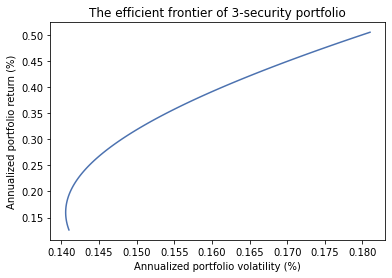

In [46]:
# Initialize figure
_,ax5 = plt.subplots(1,1)
ax5.set_ylabel("Annualized portfolio return (%)")
ax5.set_xlabel("Annualized portfolio volatility (%)")
plotEfficientFrontier(setOfWeights_three,df_2019,df_2019_corr,ax5)
plt.title("The efficient frontier of 3-security portfolio")
plt.show()

7.3	How does the PCA portfolio return compare to the 2019  3-security portfolio returns?

Well, if we compare only the optimal portfolios or minimum variance portfolios:

* For the PCA portfolio (XLK, XLE, XLV), we get Expected Return: 16% and Annual volatility: 14%.

* If we take portfolio (XLE, XLF, XLK) from 5.3 which has the highest Expected Return: 68% and Annual volatility: 21%, our risk/reward ratio is 1:3, which is better as well as the sharpe ratio.

* Overall, we get much higher Expected Return for many of the 2019 3-security portfolios as well as higher sharpe ratios.

Seems, running such combination and defining the weights using max_sharpe() function from  PyPortfolioOpt leads to better optimal portfolios.



7.4	Assuming a fixed amount of risk, and 2020 data, use the PC weights to compute the 3-PC portfolio returns.

* Here we use the the explained varicance ratios as weights, calculated on the full data set:

In [47]:
pca_weights = [0.9175935, 0.05118057, 0.01530647]

* Calculating the 3-PC portfolio returns on 2020 data:

In [48]:
three_portfolioReturns = []
for i in (range(165)):
    three_pf_Returns = getPortfolioReturn(weights=pca_weights,portfolio=combinations_of_portfolios_20[i])
    three_portfolioReturns.append(three_pf_Returns)

The Expected annual returns:

In [49]:
three_portfolioReturns_20 = pd.DataFrame(three_portfolioReturns, index=portfolio_numbers_df, 
                                 columns=["Expected annual return %:"])
three_portfolioReturns_20.sort_values(by=["Expected annual return %:"], ascending=False)

,Expected annual return %:
"(XLK:CEI, XLY:CEI, VOX:CEI)",0.490436
"(XLK:CEI, XLV:LAG, XLY:CEI)",0.480929
"(XLK:CEI, XLV:LAG, VOX:CEI)",0.480696
"(XLK:CEI, XLP:CEI, XLY:CEI)",0.479021
"(XLK:CEI, XLP:CEI, VOX:CEI)",0.478789
...,...
"(XLE:CEI, XLF:CEI, XLP:CEI)",-0.215945
"(XLE:CEI, XLF:CEI, XLU:CEI)",-0.217046
"(XLE:CEI, IYR:LAG, XLV:LAG)",-0.217241
"(XLE:CEI, XLF:CEI, IYR:LAG)",-0.217663


7.5	How does the PCA portfolio return compare to the 2020  3-security portfolio returns?

Using the PCA weights, If we compare the PCA portfolio and 3-security portfolio returns on 2020 data:

* For the PCA portfolio (XLK, XLE, XLV) on 2020 data, we get Expected Return: -19%.

* If we compare it to portfolio (XLE, XLF, XLK) just like from 7.3, we get Expected Return -21%.
    
* Overall, using PCA weights, we get more negative returns. If look at XLB, XLE, VOX portfolio from 5.5, we can see that the Expected Return is 76%, while using PCA weights we get 49%